In [16]:
import string

ALFABETO = string.ascii_uppercase
M = 26

def normalizar_clave(clave: str) -> str:
    k = "".join([c for c in clave.upper() if c in ALFABETO])
    if not k:
        raise ValueError("La clave debe tener al menos una letra A-Z.")
    return k

def vigenere_cifrar(mensaje: str, clave: str) -> str:
    clave = normalizar_clave(clave)
    j = len(clave)
    res = []
    pos = 0  # cuenta solo letras cifradas

    for ch in mensaje.upper():
        if ch in ALFABETO:
            m_i = ord(ch) - 65
            k_i = ord(clave[pos % j]) - 65
            c_i = (m_i + k_i) % M
            res.append(chr(c_i + 65))
            pos += 1
        else:
            res.append(ch)  # conserva espacios/puntuación

    return "".join(res)

In [17]:
k = "HOLA"
m = "VAMOS A CONOCER UN NUEVO CIFRADO"
c = vigenere_cifrar(m, k)

In [18]:
print("Clave:  ", k)
print("Mensaje:", m)
print("Cifrado:", c)

Clave:   HOLA
Mensaje: VAMOS A CONOCER UN NUEVO CIFRADO
Cifrado: COXOZ O NOUCNEY IY NBSGO JWQRHRZ


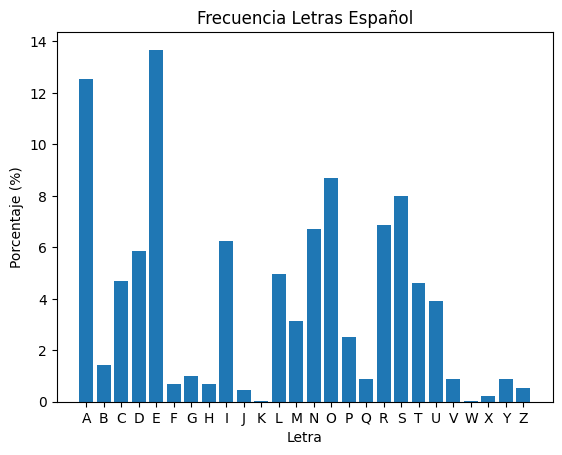

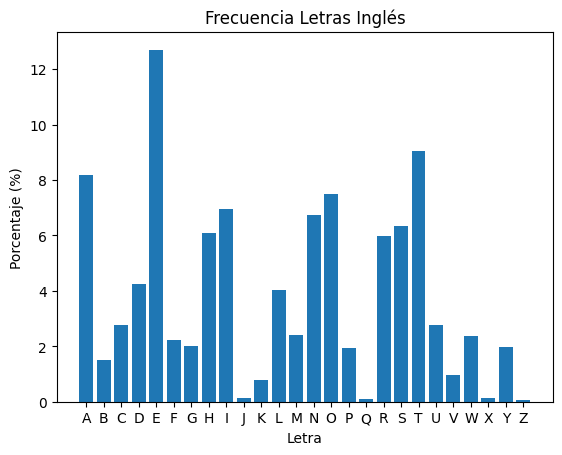

In [19]:
import matplotlib.pyplot as plt

# Frecuencias de letras (A-Z) en porcentaje
frecuencia_es = {
    'A': 12.53, 'B': 1.42, 'C': 4.68, 'D': 5.86, 'E': 13.68, 'F': 0.69,
    'G': 1.01, 'H': 0.70, 'I': 6.25, 'J': 0.44, 'K': 0.02, 'L': 4.97,
    'M': 3.15, 'N': 6.71, 'O': 8.68, 'P': 2.51, 'Q': 0.88, 'R': 6.87,
    'S': 7.98, 'T': 4.63, 'U': 3.93, 'V': 0.90, 'W': 0.01, 'X': 0.22,
    'Y': 0.90, 'Z': 0.52
}

frecuencia_en = {
    'A': 8.17, 'B': 1.49, 'C': 2.78, 'D': 4.25, 'E': 12.70, 'F': 2.23,
    'G': 2.02, 'H': 6.09, 'I': 6.97, 'J': 0.15, 'K': 0.77, 'L': 4.03,
    'M': 2.41, 'N': 6.75, 'O': 7.51, 'P': 1.93, 'Q': 0.10, 'R': 5.99,
    'S': 6.33, 'T': 9.06, 'U': 2.76, 'V': 0.98, 'W': 2.36, 'X': 0.15,
    'Y': 1.97, 'Z': 0.07
}

# Gráfica español
plt.figure()
plt.bar(frecuencia_es.keys(), frecuencia_es.values())
plt.title("Frecuencia Letras Español")
plt.ylabel("Porcentaje (%)")
plt.xlabel("Letra")
plt.show()

# Gráfica inglés
plt.figure()
plt.bar(frecuencia_en.keys(), frecuencia_en.values())
plt.title("Frecuencia Letras Inglés")
plt.ylabel("Porcentaje (%)")
plt.xlabel("Letra")
plt.show()

In [20]:
def separar_frases_por_periodo(c: str, j: int):
    frases = [""] * j
    
    pos = 0  # cuenta SOLO letras

    for ch in c.upper():
        if ch in ALFABETO:
            frases[pos % j] += ch
            pos += 1
    
    return frases

In [21]:
def imprimir_frases(cifrado: str, j: int):
    frases = separar_frases_por_periodo(cifrado, j)
    print(f">> Periodo (j) = {j}")
    print(">> Las frases son:\n")
    for i, f in enumerate(frases, start=1):
        print(f"{i}- {f}")
    return frases

In [22]:
imprimir_frases(c, 4)

>> Periodo (j) = 4
>> Las frases son:

1- CZUYBJH
2- OOCISWR
3- XNNYGQZ
4- OOENOR


['CZUYBJH', 'OOCISWR', 'XNNYGQZ', 'OOENOR']

In [29]:
def indice_coincidencia(texto: str) -> float:
    t = "".join([c for c in texto.upper() if c in ALFABETO])
    n = len(t)
    if n < 2:
        return 0.0

    frec = {}
    for ch in t:
        frec[ch] = frec.get(ch, 0) + 1

    numerador = sum(f*(f-1) for f in frec.values())
    denominador = n*(n-1)
    return numerador / denominador

def IC_por_periodos(cifrado: str, j_min: int, j_max: int):
    print(f"{'Period':>6}  {'Index of coincidence':<}")
    for j in range(j_min, j_max + 1):
        frases = separar_frases_por_periodo(cifrado, j)
        ics = [indice_coincidencia(f) for f in frases]
        ics_str = " ".join([f"{ic:.4f}" for ic in ics])
        print(f"{j:>6}  {ics_str}")

In [30]:
IC_por_periodos(c, 1, 10)

Period  Index of coincidence
     1  0.0484
     2  0.0330 0.1410
     3  0.0556 0.0833 0.0000
     4  0.0000 0.0476 0.0476 0.2000
     5  0.0667 0.0000 0.0000 0.0000 0.0000
     6  0.0000 0.3000 0.0000 0.0000 0.0000 0.0000
     7  0.0000 0.0000 0.0000 0.0000 0.0000 0.1667 0.0000
     8  0.0000 0.0000 0.0000 0.3333 0.0000 0.0000 0.0000 0.0000
     9  0.3333 0.3333 0.0000 0.0000 0.0000 0.0000 0.3333 0.0000 0.0000
    10  0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000 0.0000


In [32]:
def q_l_i(texto: str, l: int, i: int) -> float:
    """
    Calcula q_l(i):
    probabilidad de que la letra l ocurra
    cuando el texto se corre i posiciones.

    texto : frase (solo se usan letras A-Z)
    l     : letra objetivo (0=A, ..., 25=Z)
    i     : shift (0..25)
    """
    # dejar solo letras
    t = [c for c in texto.upper() if c in ALFABETO]
    n = len(t)
    if n == 0:
        return 0.0

    letra_obj = chr(l + ord('A'))
    conteo = 0

    for ch in t:
        val = (ord(ch) - ord('A') + i) % 26
        if chr(val + ord('A')) == letra_obj:
            conteo += 1

    return conteo / n

In [34]:
# pasar porcentajes a probabilidades
p_espanol = {k: v/100 for k, v in frecuencia_es.items()}
p_ingles = {k: v/100 for k, v in frecuencia_en.items()}


In [35]:
def d_i(texto: str, i: int, p_dist: dict) -> float:
    d = 0.0
    for l in range(26):
        letra = chr(l + ord('A'))
        p_l = p_dist[letra]
        q_li = q_l_i(texto, l, i)
        d += (p_l - q_li) ** 2
    return d

In [36]:
def tabla_d_i(texto: str, p_dist: dict):
    print(f"{'i':>2} {'Letra':>6} {'d(i)':>10}")
    print("-" * 22)

    valores = {}
    for i in range(26):
        di = d_i(texto, i, p_dist)
        valores[i] = di
        print(f"{i:>2} {chr(i+65):>6} {di:>10.4f}")

    mejor_i = min(valores, key=valores.get)
    print("\n>> Mejor shift:")
    print(f"   i = {mejor_i}  →  letra = {chr(mejor_i + 65)}")

    return valores

In [37]:
frase = "UTTFOFQJUWFEPUDVSOFI"   # 20 letras
tabla_d_i(frase, p_ingles)

 i  Letra       d(i)
----------------------
 0      A     0.0844
 1      B     0.1166
 2      C     0.1107
 3      D     0.0925
 4      E     0.1064
 5      F     0.1102
 6      G     0.1043
 7      H     0.1217
 8      I     0.0877
 9      J     0.0819
10      K     0.0673
11      L     0.0946
12      M     0.0839
13      N     0.0941
14      O     0.0609
15      P     0.0933
16      Q     0.1071
17      R     0.1136
18      S     0.1095
19      T     0.0980
20      U     0.1058
21      V     0.0801
22      W     0.1094
23      X     0.0928
24      Y     0.0792
25      Z     0.0271

>> Mejor shift:
   i = 25  →  letra = Z


{0: 0.08441225999999998,
 1: 0.11661225999999998,
 2: 0.11067226,
 3: 0.09253226,
 4: 0.10641226000000001,
 5: 0.11024225999999998,
 6: 0.10429226,
 7: 0.12167226,
 8: 0.08771226000000001,
 9: 0.08193226,
 10: 0.06734226000000001,
 11: 0.09461225999999999,
 12: 0.08390225999999998,
 13: 0.09410226,
 14: 0.06091226000000002,
 15: 0.09326226,
 16: 0.10707226,
 17: 0.11359226,
 18: 0.10950226000000002,
 19: 0.09802226,
 20: 0.10576226,
 21: 0.08010225999999998,
 22: 0.10942225999999997,
 23: 0.09278226,
 24: 0.07917226000000001,
 25: 0.02712226}